## Leeds Sports Pose Dataset

In [1]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PATH_DATASET = './dataset/'
# PATH_IMAGES = './dataset/images/'
# PATH_ANNO = './dataset/annotations/joints.mat'
PATH_DATASET = './dataset/'
PATH_IMAGES = './dataset/resize_images/'
PATH_ANNO = './dataset/resize_annotations/new_joints.mat'

### Obtención de datos

In [6]:
# Traspongo la matriz almacenada en el joints.mat para obtener una matriz (2000,14,3)
annotations = scipy.io.loadmat(PATH_ANNO)['joints']

In [7]:
type(annotations)

numpy.ndarray

In [8]:
annotations.shape

(2000, 14, 3)

In [9]:
new_annotation = []
for annotation in annotations:
    new_coor = []
    for coor in annotation:
        new_coor.append(np.where(coor == 0, 2, coor))
    new_annotation.append(np.array(new_coor))

In [10]:
np.array(new_annotation).shape

(2000, 14, 3)

In [11]:
np.array(new_annotation)[0]

array([[ 57.95283019, 270.63152053,   2.        ],
       [ 59.46448391, 221.50277469,   2.        ],
       [ 56.44117647, 160.28079911,   2.        ],
       [ 82.89511654, 161.03662597,   2.        ],
       [ 81.38346282, 210.16537181,   2.        ],
       [ 82.13928968, 250.9800222 ,   2.        ],
       [ 48.12708102, 100.57047725,   2.        ],
       [ 30.74306326, 119.46614872,   2.        ],
       [ 47.37125416,  80.16315205,   2.        ],
       [ 97.25582686,  83.94228635,   2.        ],
       [101.03496115, 111.90788013,   2.        ],
       [103.30244173, 111.90788013,   2.        ],
       [ 73.82519423,  68.82574917,   2.        ],
       [ 75.33684795,  30.27857936,   2.        ]])

In [12]:
arr_annotation = np.array(new_annotation)

In [13]:
arr_annotation.shape

(2000, 14, 3)

In [14]:
# Funcion para la obtencion de todas las direcciones de las imagenes
def get_imagesPath(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) 
             if os.path.isfile(os.path.join(directory, f))]
    return files

In [15]:
imgs_path = get_imagesPath(PATH_IMAGES)

In [16]:
np.shape(imgs_path)

(2000,)

### Plot de los datos registrados

In [17]:
def plot_img(img_path, dpi = 100):
    img = plt.imread(img_path)
    plt.figure(figsize=(np.shape(img)[0]/dpi, np.shape(img)[1]/dpi), dpi=dpi)
    plt.imshow(img)

In [18]:
def plot_keypoints(keypoints_list):
    for keypoints in keypoints_list:
        plt.scatter(x = keypoints[0], y = keypoints[1], s = 6, color=['red'])

In [19]:
# Esto es para dividir entre la coordenadas de los keypoints y la visibilidad del mismo
# coordenadas = annotations[:-1]
# visibility = annotations[2]

In [20]:
ID = 0

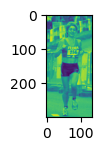

In [21]:
plot_img(imgs_path[ID])

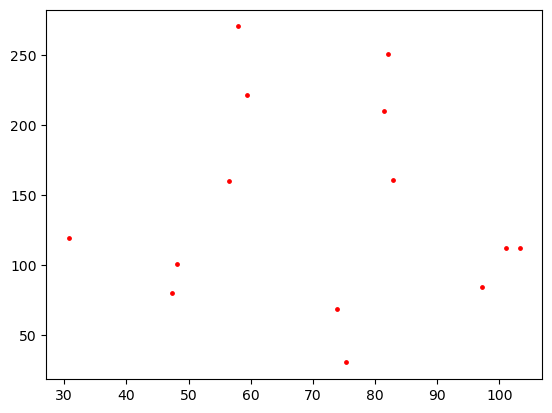

In [22]:
plot_keypoints(annotations[ID])

In [23]:
def plot_img_with_keypoints(img_path, keypoints):
    plot_img(img_path)
    plot_keypoints(keypoints)

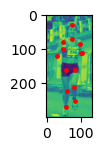

In [24]:
ID = 0
plot_img_with_keypoints(imgs_path[ID], annotations[ID])

In [25]:
# Terminar de generar la funcion para que muestren diferentes imagenes de ejemplo
import random
from random import randrange

def subplot_train_imgs(cant_imgs, img_path, keypoints):
    idx = [x for x in range(2000)]
    unique = random.sample(idx , k = cant_imgs)
    return unique

In [26]:
x = subplot_train_imgs(10, imgs_path, annotations)
x

[228, 577, 1976, 494, 635, 468, 1971, 288, 1913, 1784]

### Conversión de las anotaciones a formato COCO

La anotación utilizada por COCO se puede ver en el siguiente [link](https://cocodataset.org/#format-data).
Dentro del formato COCO podemos encontrar:


{
"info": info, "images": [image], "annotations": [annotation], "licenses": [license],
}

info{
"year": int, "version": str, "description": str, "contributor": str, "url": str, "date_created": datetime,
}

**image{
"id": int, "width": int, "height": int, "file_name": str, "license": int, "flickr_url": str, "coco_url": str, "date_captured": datetime,
}**

license{
"id": int, "name": str, "url": str,
}

**annotation{
"id": int, "image_id": int, "category_id": int, "segmentation": RLE or [polygon], "area": float, "bbox": [x,y,width,height], "iscrowd": 0 or 1,
}**

categories[{
"id": int, "name": str, "supercategory": str,
}]

Links de referencia:
* [Custom COCO Dataset](https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch/#create-custom-coco-dataset)
* [1](https://github.com/jonathanstaniforth/coco-annotation-generator)
* [2](https://github.com/Tony607/labelme2coco/blob/master/labelme2coco.py)
* [3](https://github.com/jsbroks/coco-annotator)
* [4](https://www.kaggle.com/code/mistag/sartorius-create-coco-annotations)
* [5](https://www.dlology.com/blog/how-to-create-custom-coco-data-set-for-instance-segmentation/)
* [6](https://github.com/Tony607/mmdetection_instance_segmentation_demo/blob/master/mmdetection_train_custom_coco_data_segmentation.ipynb)
* [7](https://github.com/open-mmlab/mmdetection)
* [8](https://towardsdatascience.com/8-tips-for-object-oriented-programming-in-python-3e98b767ae79)

In [27]:
import json

class COCO:
    def __init__(self):
        self._info = {}
        self._licenses = []
        self._images = []
        self._annotations = []
        self._categories = []
    
    def setInfo(self, info):
        self._info = info
    
    def addLicense(self, license):
        self._licenses.append(license)

    def addImage(self, image):
        self._images.append(image)
    
    def addAnnotation(self, annotation):
        self._annotations.append(annotation)
    
    def addCategorie(self, categories):
        self._categories.append(categories)
        
    def getLicense(self):
        return self._licenses[0]
    
    def toJson(self):
        annotations = []
        categories = []
        licenses = []
        images = []

        # Convert images to JSON
        for image in self._images:
            images.append(image.toJson())

        # Convert licenses to Json
        for license in self._licenses:
            licenses.append(license.toJson())

        # Convert annotations
        for annotation in self._annotations:
            annotations.append(annotation.toJson())

        # Convert categories
        for category in self._categories:
                categories.append(category.toJson())

        return {
            'info': self._info.toJson(),
            'licenses': licenses,
            'images': images,
            'annotations': annotations,
            'categories': categories 
        }
    
    def exportJson(self, outputPath, fileName):
        # os.getcwd() Obtains actual workplace path
        with open(outputPath + fileName, 'w', encoding='utf-8') as f:
            json.dump(self.toJson(), f, ensure_ascii=False, indent=4)

In [28]:
# info{ "year": int, "version": str, "description": str, "contributor": str, "url": str, "date_created": datetime, }
class Info:
    def __init__(self, year: int, version: str, description: str, contributor: str, url: str, date_created):
        self._year = year
        self._version = version
        self._description = description
        self._contributor = contributor
        self._url = url
        self._date_created = date_created 
    
    def toJson(self):
        return {
            'year': self._year,
            'version': self._version,
            'description': self._description,
            'contributor': self._contributor,
            'url': self._url,
            'date_created': self._date_created
        }

In [29]:
#license{ "id": int, "name": str, "url": str, }
class License:
    def __init__(self, license_id: int, name: str, url: str):
        self.id = license_id
        self.name = name
        self.url = url
        
    def getId(self):
        return self.id
    
    def toJson(self):
        return {
            'id': self.id,
            'name': self.name,
            'url': self.url
        }

In [30]:
# categories[{ "id": int, "name": str, "supercategory": str, "keypoints": [str], "skeleton": [edge],}]
class Categories:
    def __init__(self, category_id: int, name: str, supercategory: str, keypoints, skeleton):
        self.category_id = category_id
        self.name = name
        self.supercategory = supercategory
        self.keypoints = keypoints
        self.skeleton = skeleton
    
    def toJson(self):
        return {
            'id': self.category_id,
            'name': self.name,
            'supercategory': self.supercategory,
            'keypoints': self.keypoints,
            'skeleton': self.skeleton
        }

In [31]:
# image{ "id": int, "width": int, "height": int, "file_name": str, "license": int, "flickr_url": str, "coco_url": str, "date_captured": datetime, }
class ImageCOCO:
    def __init__(self, image_id: int, width: int, height: int, file_name: str, license: int, flick_url: str, coco_url: str, date_captured):
        self.id = image_id
        self.width = width
        self.height = height
        self.file_name = file_name
        self.license = license
        self.flickr_url = ''
        self.coco_url = ''
        self.date_captured = date_captured
        
    def getId(self):
        return self.id
    
    def toJson(self):
        return {
            'id': self.id,
            'width': self.width,
            'height': self.height,
            'file_name': self.file_name,
            'license': self.license,
            'flickr_url': self.flickr_url,
            'coco_url': self.coco_url,
            'date_captured': self.date_captured
        }

In [32]:
# annotation{ "id": int, "image_id": int, "category_id": int, "segmentation": RLE or [polygon], "area": float, "bbox": [x,y,width,height], "iscrowd": 0 or 1, 
# "keypoints": [x1,y1,v1,...], "num_keypoints": int}
class Annotation:
    def __init__(self, annotation_id: int, image_id: int, category_id: int, segmentation, area: float, bbox, iscrowd: int, keypoints, num_keypoints: int):
        self.id = annotation_id
        self.image_id = image_id
        self.category_id = category_id
        self.segmentation = segmentation 
        self.area = area
        self.bbox = bbox
        self.iscrowd = iscrowd
        self.keypoints = keypoints
        self.num_keypoints = num_keypoints
    
    def toJson(self):
        return {
            'id': self.id,
            'image_id': self.image_id,
            'category_id': self.category_id,
            'segmentation': self.segmentation,
            'area': self.area,
            'bbox': self.bbox,
            'iscrowds': self.iscrowd,
            'keypoints': self.keypoints,
            'num_keypoints': self.num_keypoints
        }


In [33]:
from datetime import datetime
currentDateTime = datetime.now().strftime('%Y-%m-%d')
coco = COCO()
coco.setInfo(Info(2022, "1.0.0", "LSP_COCO_Dataset", "", "", currentDateTime))
coco.addLicense(License(1, 'Hospital Italiano', 'https://www.hospitalitaliano.org.ar'))
coco.addCategorie(Categories(1, 'person', 'person', 
                             ['Right ankle', 'Right knee', 'Right hip', 'Left hip', 'Left knee', 'Left ankle', 
                              'Right wrist', 'Right elbow', 'Right shoulder', 'Left shoulder', 'Left elbow', 'Left wrist', 
                              'Neck', 'Head top'], 
                             [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], 
                              [7, 8], [8, 9], [9, 10], [10, 11], [11, 12],
                              [14, 13], [9, 13], [10, 13],
                              [3, 9], [4, 10]]))                        

In [72]:
imgs_path[0]

'./dataset/resize_images/im0001.jpg'

In [73]:
int(((imgs_path[0].split('/')[-1]).split('.', 1)[0]).replace('im', ''))

1

In [74]:
from PIL import Image

In [77]:
# with Image.open(imgs_path[0]).show() as im:
#    im.show()

IndentationError: unexpected indent (144058691.py, line 2)

In [43]:
train_annotation = annotations[:int(len(annotations)*0.8)][0]

In [44]:
test_annotation = annotations[int(len(annotations)*0.8):][0]

In [45]:
keypoints_original_flattened = [el for kp in annotations[0] for el in kp]

In [83]:
NUM_KEYPOINTS = 14
annotationNumber = 1

for imageFile in imgs_path:
    
    # Extract ID from file name
    fileId = int(((imageFile.split('/')[-1]).split('.', 1)[0]).replace('im', ''))
    
    # Create image
    image = Image.open(imageFile)
    width, height = image.size

    cocoImage = ImageCOCO(fileId, width, height, imageFile.split('/')[-1], coco.getLicense().getId(), '', '', currentDateTime)
    coco.addImage(cocoImage)

    # Create annotation for image
    annotation = Annotation(annotationNumber, cocoImage.getId(), 1, [], 0.00, [], 0, [el for kp in annotations[annotationNumber-1] for el in kp], NUM_KEYPOINTS)
    coco.addAnnotation(annotation)
    annotationNumber += 1
    break

300


In [84]:
from datetime import datetime

def create_COCO(imagesPath, annotations, number_keypoints):
    """
    
    """
    currentDateTime = datetime.now().strftime('%Y-%m-%d')
    coco = COCO()
    coco.setInfo(Info(2022, "1.0.0", "LSP_COCO_Dataset", "", "", currentDateTime))
    coco.addLicense(License(1, 'Hospital Italiano', 'https://www.hospitalitaliano.org.ar'))
    coco.addCategorie(Categories(1, 'person', 'person', 
                             ['Right ankle', 'Right knee', 'Right hip', 'Left hip', 'Left knee', 'Left ankle', 
                              'Right wrist', 'Right elbow', 'Right shoulder', 'Left shoulder', 'Left elbow', 'Left wrist', 
                              'Neck', 'Head top'], 
                             [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], 
                              [7, 8], [8, 9], [9, 10], [10, 11], [11, 12],
                              [14, 13], [9, 13], [10, 13],
                              [3, 9], [4, 10]]))
    new_annotation = []
    
    for annotation in annotations:
        new_coor = []
        for coor in annotation:
            new_coor.append(np.where(coor == 0, 2, coor))
        new_annotation.append(np.array(new_coor))
    
    
    annotationNumber = 1

    for imageFile in imagesPath:
        # Extract ID from file name
        fileId = int(((imageFile.split('/')[-1]).split('.', 1)[0]).replace('im', ''))

        # Create image
        image = Image.open(imageFile)
        width, height = image.size

        cocoImage = ImageCOCO(fileId, width, height, imageFile.split('/')[-1], coco.getLicense().getId(), '', '', currentDateTime)
        coco.addImage(cocoImage)

        # Create annotation for image
        annotation = Annotation(annotationNumber, cocoImage.getId(), 1, [], 0.00, [], 0, [el for kp in new_annotation[annotationNumber-1] for el in kp], NUM_KEYPOINTS)
        coco.addAnnotation(annotation)
        annotationNumber += 1
    
    return coco

In [91]:
imgs_path = get_imagesPath(PATH_IMAGES)

In [95]:
# Variables
imgs_path = get_imagesPath(PATH_IMAGES)
annotations = scipy.io.loadmat(PATH_ANNO)['joints']
NUM_KEYPOINTS = 14

# Train, Val, and Test Split
idx_train = [x for x in range(int(len(annotations)*0.7))]
idx_val = [x+1400 for x in range(int(len(annotations)*0.1))]
idx_test = [x+1600 for x in range(int(len(annotations)*0.2))]


# Train dataset
LSP_COCO_Train_Dataset = create_COCO(list(np.array(imgs_path)[idx_train]), annotations[idx_train], NUM_KEYPOINTS)
LSP_COCO_Train_Dataset.exportJson('./dataset/resize_annotations/', 'train_cocoAnnotation.json')

# Test dataset
LSP_COCO_Val_Dataset = create_COCO(list(np.array(imgs_path)[idx_val]), annotations[idx_val], NUM_KEYPOINTS)
LSP_COCO_Val_Dataset.exportJson('./dataset/resize_annotations/', 'val_cocoAnnotation.json')

# Test dataset
LSP_COCO_Test_Dataset = create_COCO(list(np.array(imgs_path)[idx_test]), annotations[idx_test], NUM_KEYPOINTS)
LSP_COCO_Test_Dataset.exportJson('./dataset/resize_annotations/', 'test_cocoAnnotation.json')

In [63]:
imgs_path = get_imagesPath(PATH_IMAGES)
annotations = scipy.io.loadmat(PATH_ANNO)['joints']
NUM_KEYPOINTS = 14
LSP_COCO_Dataset = create_COCO(imgs_path, annotations, NUM_KEYPOINTS)

In [64]:
LSP_COCO_Dataset.exportJson('./dataset/resize_annotations/', 'all_cocoAnnotation.json')

### Prueba con Voxel 51

In [67]:
import fiftyone as fo

In [96]:
# The path to the COCO labels JSON file
labels_path = "./dataset/resize_annotations/val_cocoAnnotation.json"

# Import the dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=PATH_IMAGES,
    labels_path=labels_path,
    include_id=True,
    label_types=["keypoints"],
)

 100% |█████████████████| 200/200 [538.2ms elapsed, 0s remaining, 373.2 samples/s]      


In [97]:
print(dataset)

Name:        2022.08.26.08.40.01
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:        fiftyone.core.fields.ObjectIdField
    filepath:  fiftyone.core.fields.StringField
    tags:      fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    keypoints: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Keypoints)
    coco_id:   fiftyone.core.fields.IntField


In [99]:
session = fo.launch_app(dataset)


Could not connect session, trying again in 10 seconds

Could not connect session, trying again in 10 seconds


